## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
Lead Conversion Process - Demonstrated as a funnel
Error. Image not found
Lead Conversion Process - Demonstrated as a funnel

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 
### Goals of the Case Study

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
    There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

 
### Results Expected

- A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
    The word document filled with solutions to all the problems.
    The overall approach of the analysis in a presentation
        Mention the problem statement and the analysis approach briefly 
        Explain the results in business terms
        Include visualisations and summarise the most important results in the presentation
    A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

 

### You need to submit the following four components:

- Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
    Word File: Answer all the questions asked by the company in the word document provided.
    Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
    PDF File: Write the summary report in a word file and submit it as a PDF.

 

In [1]:
# import libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Displaying max rows and columns :
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Loading and Checking the data

In [3]:
lead = pd.read_csv('Leads.csv')

In [4]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
# checking the rows and columns in the data
lead.shape

(9240, 37)

In [6]:
# checking the datatypes in the dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking the numeric data summary in the data
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# checking for the duplicates in the dataset

lead.duplicated().value_counts()

False    9240
dtype: int64

### Observations
1. Some of the columns have many null values , these columsn can be dropped
2. Some columns have 'Select' in entries. Since select is a default value when the user does not select any other option from the dropdown menu. we will drop those entries from the data
3. The Prospect_ID and Lead Number both can be considered as the unique value of the customer so lets drop any one column and proceed
4. Some of the columns have the outliers like 'TotalVisit', 'Total time spent on Website', 'Page Views per visit' 

# Cleaning the dataset

In [9]:
# Checking the no of missing values in the data

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Calculating the percent the missing values from the data

(lead.isnull().mean()* 100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
# Dropping the columns having null percent greater than 30% 

for column in lead.columns:
    if (lead[column].isnull().mean() * 100) > 30:
        lead.drop(column, 1, inplace = True)

In [12]:
# Checking the null values again

(lead.isnull().mean()* 100).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [13]:
# The columns 'Prospect_ID', 'City', 'Country' are the redundant data , so we can drop these values

remove_col = ['Prospect ID','Country','City']

lead.drop(remove_col, axis = 1, inplace = True)

In [14]:
(lead.isnull().mean()* 100).sort_values(ascending = False)

Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Number                                       0.000000
Newspaper                                         0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

The first 4 column above needs to be dealth with since these columns still has high no oof null values so lets view each colum individually and decide what will be the better way to hadle these values


#### Lead Profile

In [15]:
# Considering the column 'Lead Profile'
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Most of the data has value 'Select' so we impute these select columns with null values, as its unselected options from the discussion ablove

In [16]:
# Replaceing 'Select' values with the null value:

# lead.replace(lead[lead['Lead Profile'] == 'Select'], value = np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.NaN)

#### What matters most to you in choosing a course 

In [17]:
# Considering the column 'What matters most to you in choosing a course'
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Here we see that it has the values "Better Career Prospects" the most and the other two has 2 and 1 values respectively. Thus we decide to drop this column 

In [18]:
# Dropping the column "What matters most to you in choosing a course"

lead.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

#### What is your current occupation

In [19]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Counting null values in column 'What is your current occupation':

lead['What is your current occupation'].isnull().sum()

2690

In [21]:
# Since there are lot of values that needs to be filled we can impute the missing values, with another value: 

lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Not given')

#### How did you hear about X Education

In [22]:
# Lets look at the 'How did you hear about X Education' column:

lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [23]:
# The column also has the 'Select' values in it which needs to be handled:
# we will replace the Select values with np.nan

lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select',np.NaN)

#### Specialization 

In [24]:
# Lets check the values of the column 'Specialiation' :

lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
# Just as we have done previously, thiscolumn also has the 'Select' values in it which needs to be handled:
# we will replace the Select values with np.nan

lead['Specialization'] = lead['Specialization'].replace('Select', np.NaN)

In [26]:
(lead.isnull().mean()*100).sort_values(ascending = False)

How did you hear about X Education          78.463203
Lead Profile                                74.188312
Specialization                              36.580087
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Lead Number                                  0.000000
Newspaper                                    0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Search                                       0.000000
X Education Forums                           0.000000
Newspaper Article           

- There are various specialization that needs to be considered, so instead of dropping the value we can replace the null values with 'Others'.
- There maay be specialization other than that mentioned in the dropdown list and thus is not mentioned by the user

In [27]:
# replacing the null values from 'Specialization' by "Others" :

lead['Specialization'] = lead['Specialization'].replace(np.NaN, 'Others')

In [28]:
#### Also dropping the columns having more than 30 percent of missing data: 
# Here the column 'How did you hear about X Education' have 78.463203 % of missing values and 
#  'Lead Profile' have 74.188312 % of missing values

rem_col = ['How did you hear about X Education','Lead Profile']

lead.drop(rem_col, axis = 1, inplace = True)

#### We have to deal with the columns 'TotalVisits' ,'Page Views Per Visit' ,'Last Activity' for the missing data. Lets check each of the columns separately

### TotalVisits

In [29]:
lead['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [30]:
## the maximum occurence is of '0.0' , thus we will impute the ull values with 0.0

lead['TotalVisits'] = lead['TotalVisits'].fillna(0.0)

### Page Views Per Visit

In [31]:
lead['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [32]:
## the maximum occurence is of '0.0' , thus we will impute the ull values with 0.0

lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(0.0)

### Last Activity

In [33]:
lead['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [34]:
## the maximum occurence is of 'Email Opened' , thus we will impute the ull values with Email Opened

lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')

### Lead Source

In [35]:
lead['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

In [36]:
## the maximum occurence is of 'Google' , thus we will impute the ull values with Google

lead['Lead Source'] = lead['Lead Source'].fillna('Google')

In [37]:
# lets see the null values of the lead scoring data once again

lead.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

## Handling Binary Columns in Lead_Score data

In [38]:
# Data Cleaning in categorical Columns:

#Check the number of unique categories in each categorical column.

# df.groupby('param')['column'].nunique().sort_values(ascending=False).unique().tolist()


df = lead.select_dtypes(exclude = ['int','float'])

for col in df.columns:
    print(col)
    print('Unique categories : ',df[col].nunique())
    print('All categories : ',df[col].value_counts())
    print('\n')
# df_ = df.select_dtypes(exclude=['int', 'float'])
# for col in df_.columns:
#     print(df_[col].unique()) # to print categories name only
#     print(df_[col].value_counts()) 

Lead Number
Unique categories :  9240
All categories :  655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64


Lead Origin
Unique categories :  5
All categories :  Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source
Unique categories :  21
All categories :  Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
testone              

- There are some columns which has only 1 category in the column: 
    * Such columns are 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses','Magazine'
    * We decide to drop these categories as it will not contribute to model learning in the future modelling technique
    

In [39]:
# Dropping the columns having unique category as 1:

drop_binary = ['I agree to pay the amount through cheque', 'Get updates on DM Content', 
               'Update me on Supply Chain Content', 'Receive More Updates About Our Courses',
               'Magazine']

lead.drop(drop_binary, axis = 1, inplace = True)


In [40]:
# checking the data Imbalance in rest of the categorical data:

df = lead.select_dtypes(exclude = ['int','float'])

for col in df.columns:
    print(col)
    print((df[col].value_counts(normalize = True))*100)
    print('\n')
    

Lead Number
655360    0.010823
604698    0.010823
621242    0.010823
619195    0.010823
600768    0.010823
            ...   
593502    0.010823
636228    0.010823
648518    0.010823
580937    0.010823
608255    0.010823
Name: Lead Number, Length: 9240, dtype: float64


Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64


Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
Pay per Click Ads     0.010823
youtubechannel     

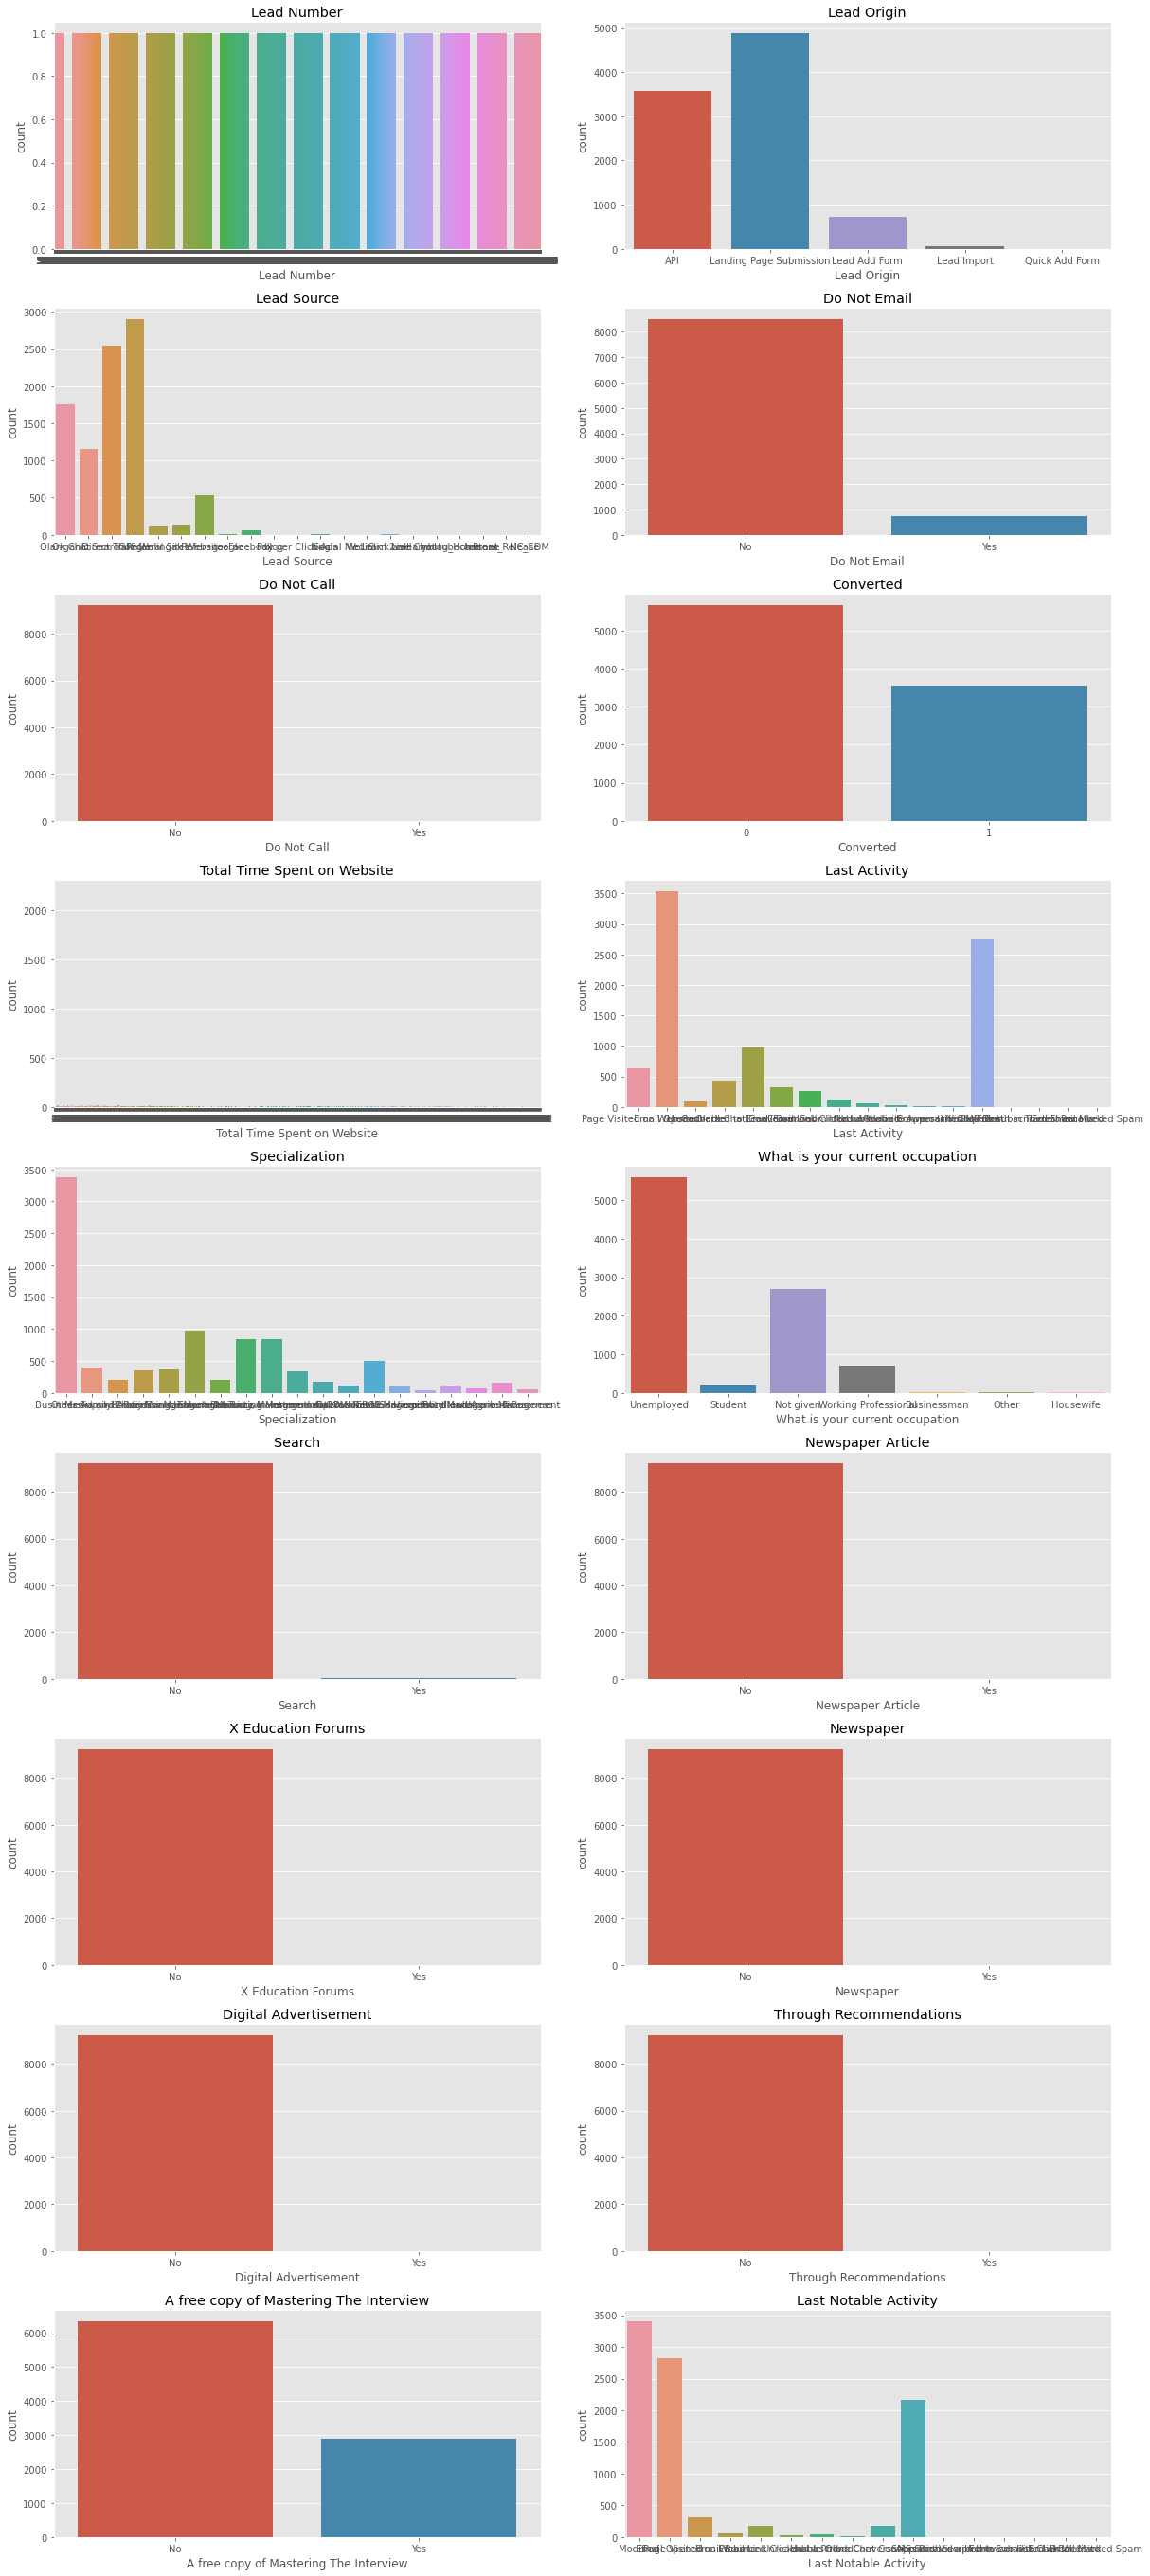

In [41]:
#This can also be viewed by plotting the bar graph:

plt.style.use('ggplot')

fig = plt.figure(figsize= (17,50))

for i,count in zip(df.columns,range(len(df.columns))):
    plt.subplot(12,2,count+1)
    sns.countplot(x = i, data = lead)
    plt.title(i)
    
plt.tight_layout()
plt.show()


From the graphs above we can see that the columns to be dropped are 'Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations'. Thus we remove this column in the next step

In [42]:
# Dropping the columns that shows large imbalance in the data:

drop_imbalance = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations']

lead.drop(drop_imbalance,axis =1, inplace = True)

In [43]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

## Converting the Datatype

### Lead Number

In [44]:
#The column Lead number is an identifier for the user, Thus it should be represented as an object:

lead['Lead Number'] = lead['Lead Number'].astype('object')

### TotalVisits

In [45]:
# Also the column 'TotalVisits' cannot be a fractional value, thus converting it into interger value:

lead['TotalVisits'] = lead['TotalVisits'].astype('int')

In [46]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   int32  
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### Thus we have handles all the missing values , handaled teh data imbalance in the categoricl data and converted teh data type where required . Now the data is ready for further analysis

## Exploratory Data Analysis

In [47]:
# Lets check the data once again:
lead.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0      660737                      API      Olark Chat          0   
1      660728                      API  Organic Search          0   
2      660727  Landing Page Submission  Direct Traffic          1   
3      660719  Landing Page Submission  Direct Traffic          0   
4      660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0            0                            0                   0.0   
1            5                          674                   2.5   
2            2                         1532                   2.0   
3            1                          305                   1.0   
4            2                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [48]:
lead.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

### Numerical Analysis

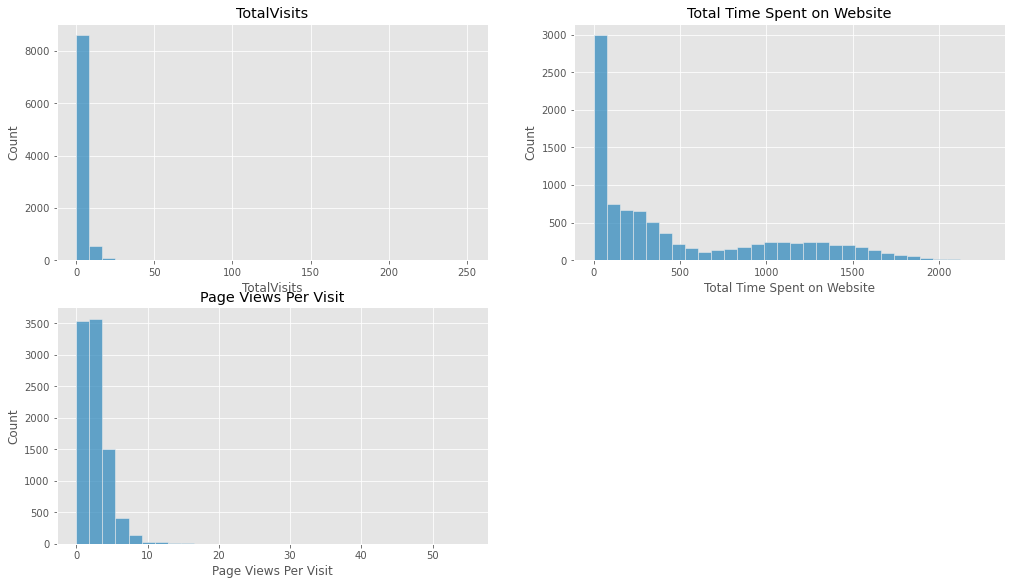

In [49]:
# Lets plot the histplot for the distribution of the numerical columns in the data:

num_col = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

# Set style
plt.style.use('ggplot')

fig = plt.figure(figsize= (17,20))

for i,count in zip(num_col,range(len(num_col))):
    plt.subplot(4,2,count+1)
    sns.histplot(x = i, data = lead, bins = 30)
    plt.title(i)
plt.show()

From the graph it is visible that the data is highly skewed. there are some outliers in the data that needs to be handled

### Checking for the outliers

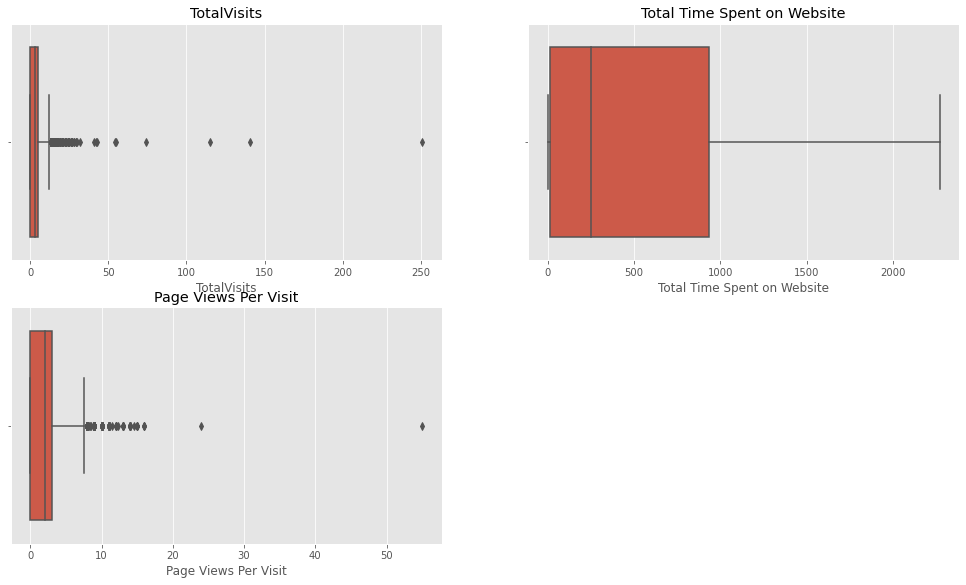

In [50]:
fig = plt.figure(figsize= (17,20))

for i,count in zip(num_col,range(len(num_col))):
    plt.subplot(4,2,count+1)
    sns.boxplot(x = i, data = lead)
    plt.title(i)
plt.show()

We can see that in the columns 'TotlVisits' and 'Page Views Per Visit' there are outliers present

### Categorical variables 

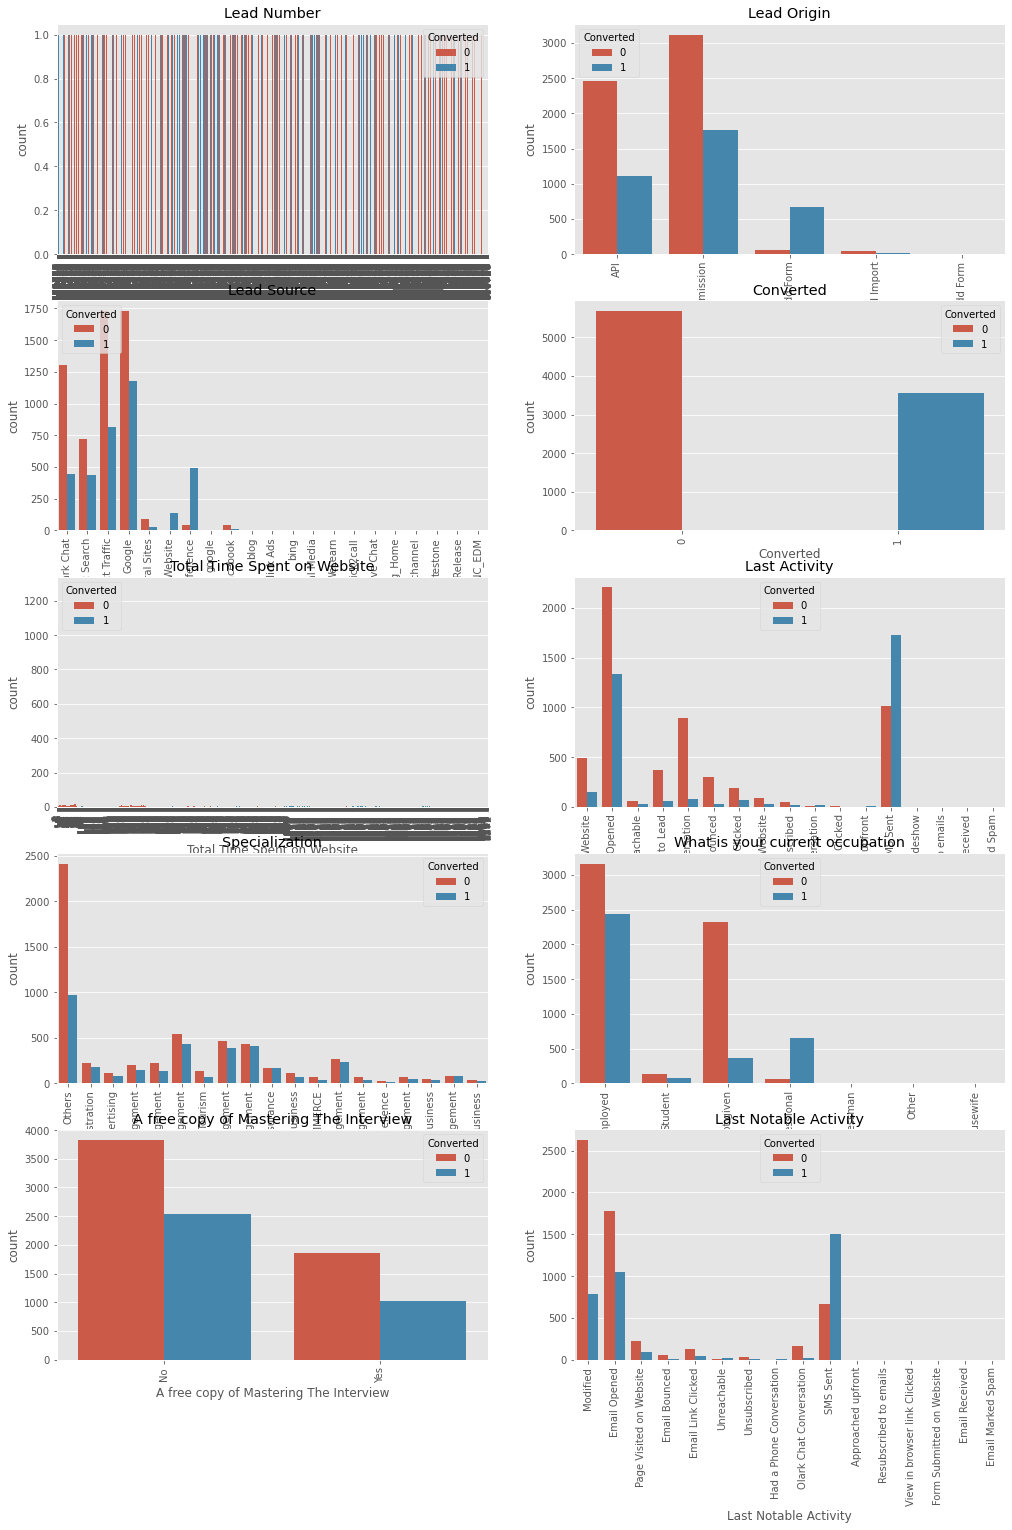

In [51]:
#  Relating all the categorical variables with the target variable "Converted"

categorical_col = lead.select_dtypes(exclude = ['int','float'])

# Set style
plt.style.use('ggplot')

fig = plt.figure(figsize= (17,50))

for i,count in zip(categorical_col.columns,range(len(categorical_col.columns))):
    plt.subplot(10,2,count+1)
    sns.countplot(x = i, hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
    plt.title(i)
    
plt.show()

From the above graphs we can see the relation between the target variable and the categorical variables 

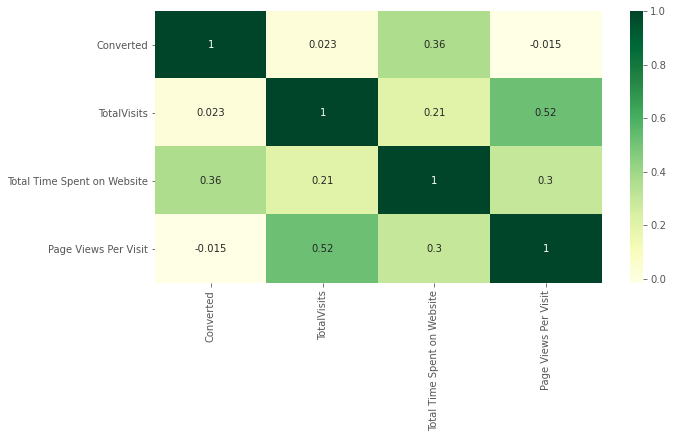

In [52]:
# Lets check the correaltion between the variables 

plt.figure(figsize = (10,5))
sns.heatmap(lead.corr(), annot = True,  cmap = "YlGn")
plt.show()

There is no much correlation between the variables , ie there is no multicollinearity between the variables, so we keep all the variables for teh further analysis


In [53]:
# Creating dummy varibles for the categorical data 

lead.loc[:,lead.dtypes == 'object'].columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We wont be considering the column 'Lead Number' as its not a contributing feature in data modelling since its just a identifier for the users

In [54]:
# Creating the dummy variables using the  'get_dummies' function :

dummy_variables = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
        'A free copy of Mastering The Interview','Last Notable Activity']], drop_first= True)



In [55]:
dummy_variables.shape

(9240, 80)

In [56]:
# Add these dummy columns to the main data

lead_score = pd.concat([lead , dummy_variables], axis = 1)
lead_score.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0      660737                      API      Olark Chat          0   
1      660728                      API  Organic Search          0   
2      660727  Landing Page Submission  Direct Traffic          1   
3      660719  Landing Page Submission  Direct Traffic          0   
4      660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0            0                            0                   0.0   
1            5                          674                   2.5   
2            2                         1532                   2.0   
3            1                          305                   1.0   
4            2                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Direct Traffic  \
0                           0                           0   
1                           0                           0   
2                           0                           1   
3                           0                           1   
4                           0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
0                     0                   0                      0   
1                     0                   0                      0   
2                     0                   0                      0   
3                     0                   0                      0   
4                     0                   1                      0   

   Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   0                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  

In [57]:
# Dropping the columns for which dummies have been created

lead_score.drop(['Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)

lead_score.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0            0                            0                   0.0   
1          0            5                          674                   2.5   
2          1            2                         1532                   2.0   
3          0            1                          305                   1.0   
4          1            2                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0 

In [58]:
lead_score.shape

(9240, 84)

## Perform  train-test Split

In [59]:
# Import the required library

from sklearn.model_selection import train_test_split

In [60]:
X = lead_score.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0            0                            0                   0.0   
1            5                          674                   2.5   
2            2                         1532                   2.0   
3            1                          305                   1.0   
4            2                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0                    0                             0   
3           

In [61]:
# Creating the target vriable as y
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the dataset into the train-test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)


In [63]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Scaling the numeric features from the data

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3112     0.007968                     0.182867              0.083333   
8413     0.019920                     0.679538              0.208333   
2961     0.011952                     0.553928              0.041667   
24       0.023904                     0.504660              0.062500   
2740     0.011952                     0.445184              0.125000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3112                                    1                          0   
8413                                    1                          0   
2961                                    0                          1   
24                                      0                          0   
2740                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
3112                        0                           0   
8413                        0                           0   
2961                        0                           0   
24                          0                           0   
2740                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
3112                           1                     0                   0   
8413                           0                     0                   0   
2961                           0                     0                   0   
24                             0                     0                   1   
2740                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
3112                      0                   0                       0   
8413                      0                   0                       0   
2961                      0                   0                       0   
24                        0                   0                       0   
2740                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
3112                           0                              0   
8413                           1                              0   
2961                           0                              0   
24                             0                              0   
2740                           1                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
3112                          0                      0   
8413                          0                      0   
2961                          0                      1   
24                            0                      0   
2740                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
3112                           0                         0   
8413                           0                         0   
2961                           0                         0   
24                             0                         0   
2740                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
3112                    0                             0                 0   
8413                    0                             0                 0   
2961                    0                             0                 0   
24                      0                             0                 0   
2740                    0                             0                 0   

      Lead Source_blog  Lead Source_google  Lead Source_testone  \
3112                 0                   0                    0   
8413                 0                   0                    0   
2961                 0                   0                    0 

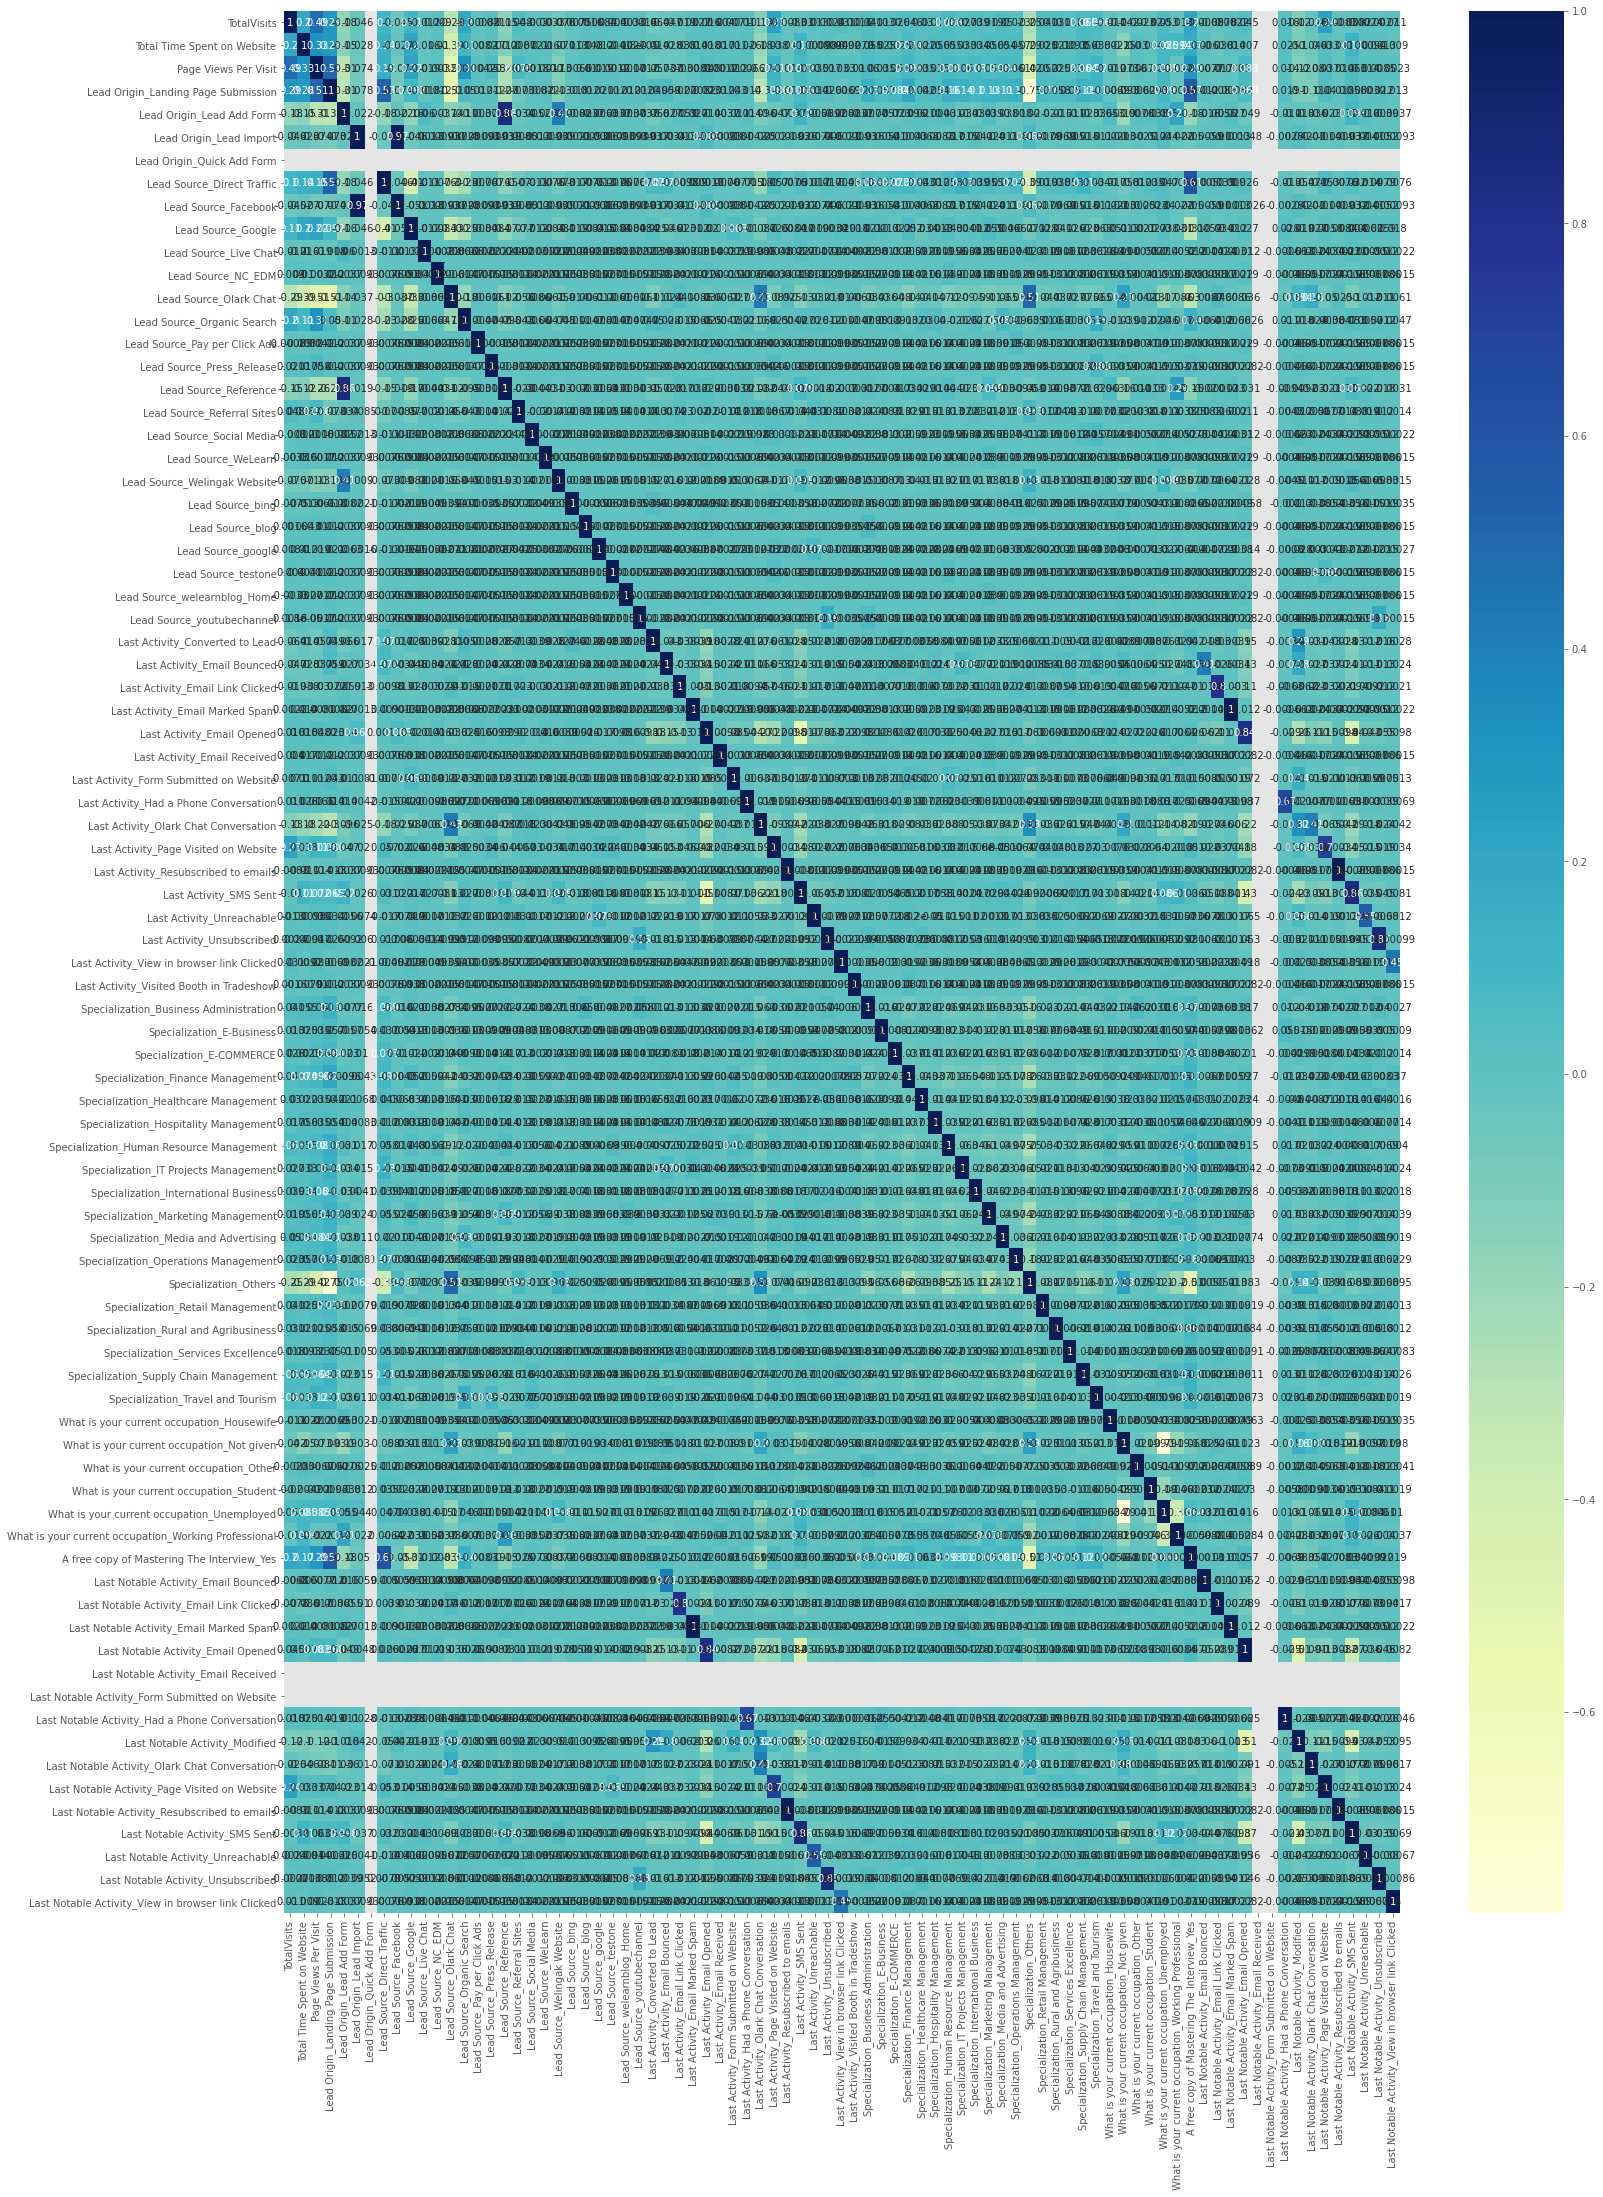

In [64]:
# Lets check the the correlation between the variables for model building

plt.figure(figsize = (25,35))
sns.heatmap(X_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

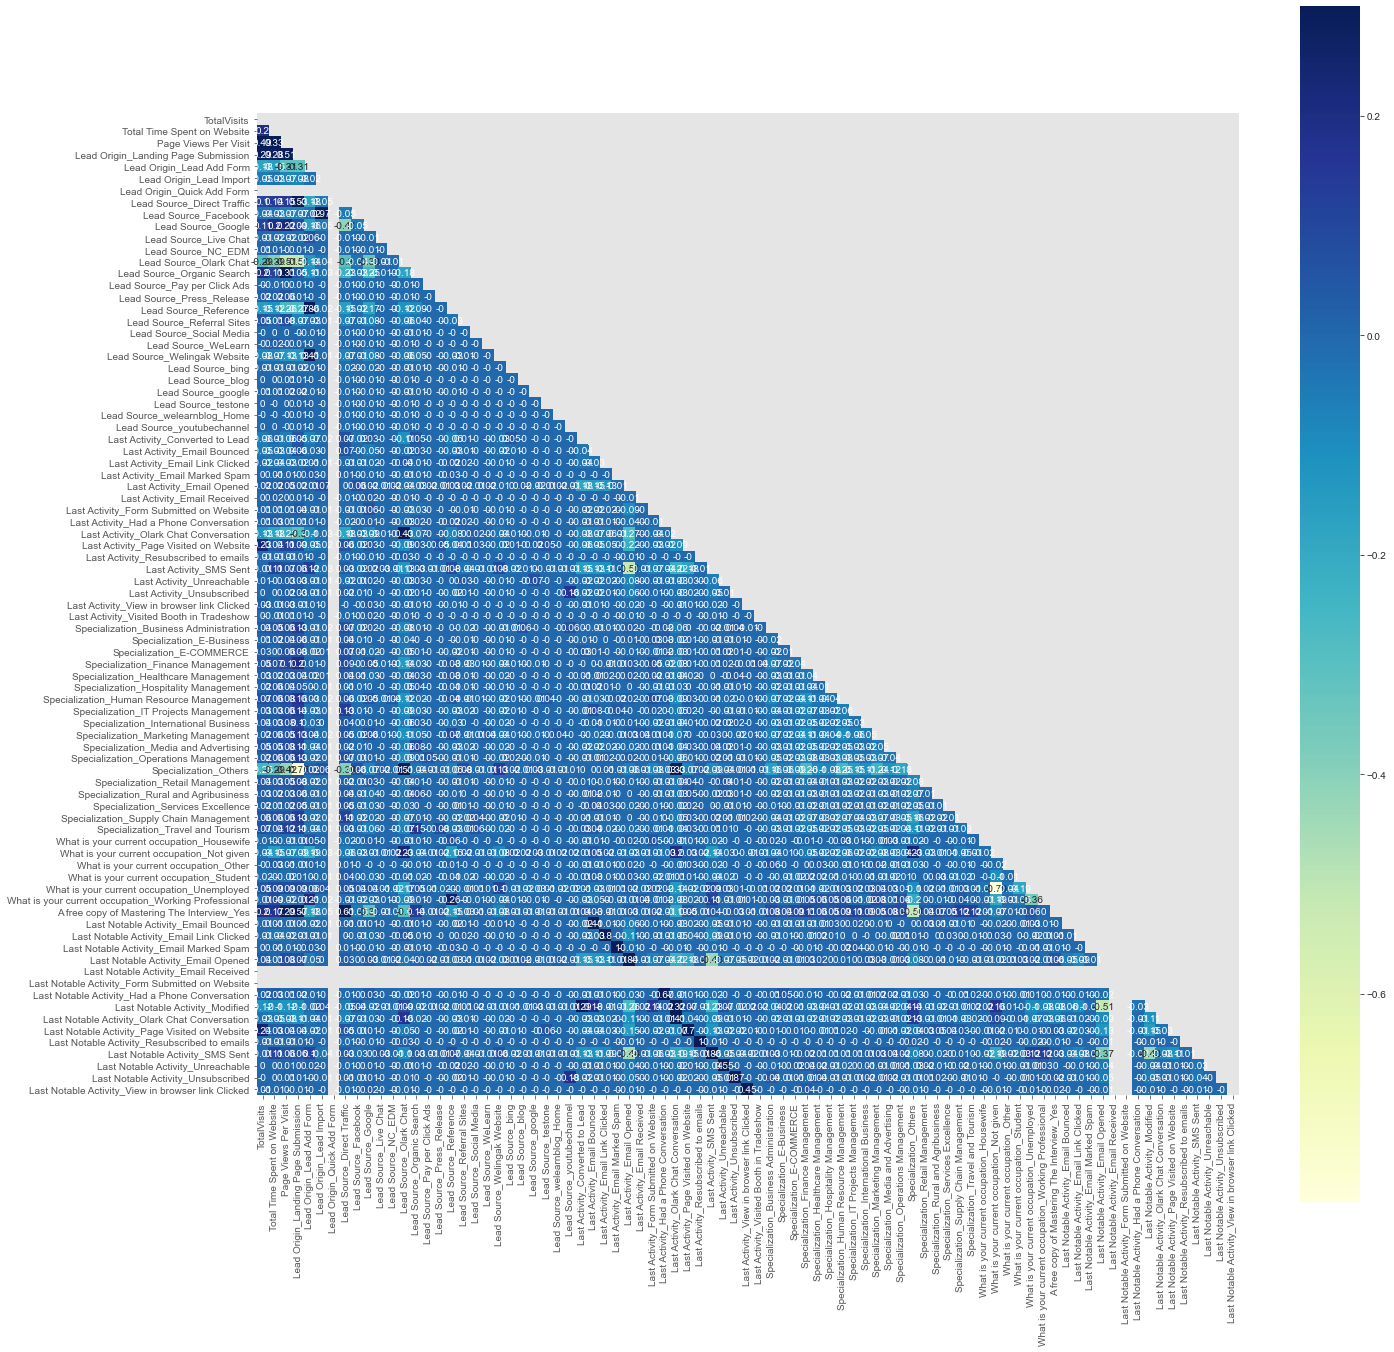

In [65]:
# Masking the map
corr = X_train.corr()
msk = np.zeros_like(corr)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(22,22))
with sns.axes_style("white"):
    ax = sns.heatmap(round(corr,2), mask=msk, annot=True, vmax=0.3, square=True, cmap="YlGnBu")
    plt.show()

As we see there are lot of varibles that are correlated and need to eb dropped for the model building. Here we will use the RFE function to choose the best variable for the model

# Model Building

Using Logistic Regression for model building
lets import the libraries from sklearn

In [66]:
# importing the log reg module form sklearn:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [67]:
# import RFE for the variable seletion:

from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)

rfe = rfe.fit(X_train, y_train)

In [68]:
# Visualize the features selectedd by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 59),
 ('Lead Origin_Quick Add Form', False, 67),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 23),
 ('Lead Source_blog', False, 45),
 ('Lead Source_google', False, 35),
 ('Lead Source_testone', False, 37),
 ('Le

In [69]:
# Collecting all the columns selected by rfe in the variable column_ :

column_ = X_train.columns[rfe.support_]

In [70]:
# Selecting columns selected by RFE

X_train = X_train[column_]

In [71]:
# Importing the statsmodels

import statsmodels.api as sm

In [72]:
# fit the model with the above features: 

X_train_sm = sm.add_constant(X_train)
log_m1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_m1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.7
Date:                Wed, 12 Jan 2022   Deviance:                       5275.5
Time:                        19:21:39   Pearson chi2:                 6.78e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4127      0.137    -10.297      0.000      -1.682      -1.144
TotalVisits                                              5.0585      1.964      2.575      0.010       1.209       8.908
Total Time Spent on Website                              4.5085      0.165     27.344      0.000       4.185       4.832
Lead Origin_Landing Page Submission                     -0.9530      0.126     -7.552      0.000      -1.200      -0.706
Lead Origin_Lead Add Form                                3.0322      0.210     14.458      0.000       2.621       3.443
Lead Source_Olark Chat                                   1.2590      0.125     10.054      0.000       1.014       1.504
Lead Source_Welingak Website                             2.8854      1.032      2.796      0.005       0.863       4.908
Last Activity_Email Bounced                             -1.6327      0.305     -5.362      0.000      -2.229      -1.036
Last Activity_Olark Chat Conversation                   -1.1995      0.163     -7.365      0.000      -1.519      -0.880
Last Activity_SMS Sent                                   1.3227      0.075     17.709      0.000       1.176       1.469
Specialization_Others                                   -0.8077      0.122     -6.601      0.000      -1.048      -0.568
What is your current occupation_Housewife               22.2287   1.84e+04      0.001      0.999    -3.6e+04    3.61e+04
What is your current occupation_Not given               -1.2298      0.088    -13.944      0.000      -1.403      -1.057
What is your current occupation_Working Professional     2.4082      0.185     13.009      0.000       2.045       2.771
Last Notable Activity_Had a Phone Conversation           3.3505      1.168      2.868      0.004       1.061       5.640
Last Notable Activity_Unreachable                        2.4641      0.677      3.639      0.000       1.137       3.791
========================================================================================================================
"""

In [73]:
# import "variance inflation factor" :

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Creating a vif dataframe for all the variables :

vif = pd.DataFrame()
vif['Fatures'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


Fatures   VIF
9                               Specialization_Others  2.49
2                 Lead Origin_Landing Page Submission  2.47
4                              Lead Source_Olark Chat  2.04
1                         Total Time Spent on Website  1.99
11          What is your current occupation_Not given  1.61
0                                         TotalVisits  1.60
8                              Last Activity_SMS Sent  1.55
7               Last Activity_Olark Chat Conversation  1.46
3                           Lead Origin_Lead Add Form  1.44
5                        Lead Source_Welingak Website  1.27
12  What is your current occupation_Working Profes...  1.22
6                         Last Activity_Email Bounced  1.08
10          What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01
13     Last Notable Activity_Had a Phone Conversation  1.00

The VIF seems alright but since there is a column whose p-value is greater than  0.05, lets eliminate the column first

In [75]:
# The column 'What is your current occupation_Housewife' seems to have a p-value of 0.999, so we decide to drop it: 

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [76]:
# Fittting the model for 2nd time with the new features :

X_train_sm = sm.add_constant(X_train)
log_m2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_m2.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.5
Date:                Wed, 12 Jan 2022   Deviance:                       5280.9
Time:                        19:21:40   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4084      0.137    -10.272      0.000      -1.677      -1.140
TotalVisits                                              5.0123      1.955      2.564      0.010       1.181       8.843
Total Time Spent on Website                              4.5086      0.165     27.348      0.000       4.186       4.832
Lead Origin_Landing Page Submission                     -0.9515      0.126     -7.541      0.000      -1.199      -0.704
Lead Origin_Lead Add Form                                3.0427      0.210     14.518      0.000       2.632       3.453
Lead Source_Olark Chat                                   1.2588      0.125     10.055      0.000       1.013       1.504
Lead Source_Welingak Website                             2.8747      1.032      2.786      0.005       0.852       4.897
Last Activity_Email Bounced                             -1.6372      0.305     -5.374      0.000      -2.234      -1.040
Last Activity_Olark Chat Conversation                   -1.2011      0.163     -7.375      0.000      -1.520      -0.882
Last Activity_SMS Sent                                   1.3191      0.075     17.668      0.000       1.173       1.465
Specialization_Others                                   -0.8101      0.122     -6.621      0.000      -1.050      -0.570
What is your current occupation_Not given               -1.2313      0.088    -13.964      0.000      -1.404      -1.058
What is your current occupation_Working Professional     2.4043      0.185     12.989      0.000       2.042       2.767
Last Notable Activity_Had a Phone Conversation           3.3463      1.168      2.864      0.004       1.057       5.636
Last Notable Activity_Unreachable                        2.4603      0.677      3.633      0.000       1.133       3.788
========================================================================================================================
"""

In [77]:
#The p values seems fine , lets check vif factor for the variables:

vif = pd.DataFrame()
vif['Fatures'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

Fatures   VIF
9                               Specialization_Others  2.49
2                 Lead Origin_Landing Page Submission  2.47
4                              Lead Source_Olark Chat  2.04
1                         Total Time Spent on Website  1.99
10          What is your current occupation_Not given  1.61
0                                         TotalVisits  1.60
8                              Last Activity_SMS Sent  1.55
7               Last Activity_Olark Chat Conversation  1.46
3                           Lead Origin_Lead Add Form  1.44
5                        Lead Source_Welingak Website  1.27
11  What is your current occupation_Working Profes...  1.22
6                         Last Activity_Email Bounced  1.08
13                  Last Notable Activity_Unreachable  1.01
12     Last Notable Activity_Had a Phone Conversation  1.00

All the vifs are below 5 and the all the p-values are below 0.05 . So we can fix this model and continue with the predictions


In [78]:
# Making Predictions:

# Predicing on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:5]


3112    0.183094
8413    0.893099
2961    0.985104
24      0.728440
2740    0.427303
dtype: float64

In [79]:
# Reshaping the predictions into an array (Converting the data into 1 dimensional array)

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:5]

array([0.18309442, 0.89309934, 0.98510359, 0.72843974, 0.42730327])

In [80]:
y_train_pred.shape

(6468,)

In [81]:
# Creating the dataframe with Converted values and the probability of Predictions

y_train_final = pd.DataFrame({'Converted' : y_train.values , 'Converted_Probability' : y_train_pred}) 

y_train_final.head()


Converted  Converted_Probability
0          0               0.183094
1          1               0.893099
2          1               0.985104
3          1               0.728440
4          0               0.427303

In [82]:
# with the threshold as 0.5, substituting 0 for values less than 0.5 and 1 otherwise 

y_train_final['Predicted'] = y_train_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_final.head()


Converted  Converted_Probability  Predicted
0          0               0.183094          0
1          1               0.893099          1
2          1               0.985104          1
3          1               0.728440          1
4          0               0.427303          0

# Model evaluation

In [83]:
# For Evaluation lets import the skelarn metrics :

from sklearn import metrics


In [84]:
# Creating the confusion matrix :

conf_metric = metrics.confusion_matrix(y_train_final.Converted, y_train_final.Predicted)

conf_metric


array([[3499,  455],
       [ 737, 1777]], dtype=int64)

In [85]:
# Checking the overall accuracy :

metrics.accuracy_score(y_train_final.Converted, y_train_final.Predicted)



0.8157081014223871

The accuracy is around 81.5 percent which can be considered as gooad accuracy for the model

In [86]:
# Calculating other metrics for evaluation

# Substituting values for TP, TN, FP, FN

TP = conf_metric[1,1]

TN = conf_metric[0,0]

FP = conf_metric[0,1]

FN = conf_metric[1,0]


In [87]:
# Calculating the sensitivity of the model

TP / (TP + FN)

0.7068416865552903

In [88]:
# Calculating the specificity of the model

TN /(TN + FP)

0.8849266565503288

Considering teh cutof  of 0.5 , we have the accuracy of 81% , sensitivity of 71 % and the specificity of 89 %

### Optimise the cut-off 

In [89]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_final.Converted, y_train_final.Converted_Probability, drop_intermediate = False )



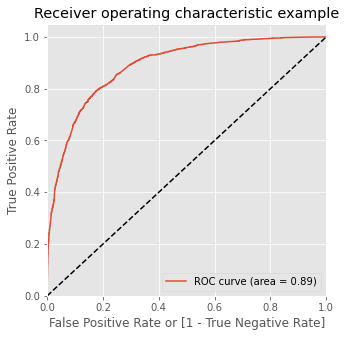

In [91]:
# ROC function call

draw_roc(y_train_final.Converted, y_train_final.Converted_Probability)

In [92]:
# To see the values with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_final.head()



Converted  Converted_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0               0.183094          0    1    1    0    0    0    0   
1          1               0.893099          1    1    1    1    1    1    1   
2          1               0.985104          1    1    1    1    1    1    1   
3          1               0.728440          1    1    1    1    1    1    1   
4          0               0.427303          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    1    1    0  
2    1    1    1    1  
3    1    1    0    0  
4    0    0    0    0

In [93]:
# Lets created daatframe to check th values of vaarious metrics when we use the above cut-off values for the predictions

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Converted, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
cutoff_df



prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.581323  0.982896  0.325999
0.2   0.2  0.759586  0.918059  0.658827
0.3   0.3  0.790971  0.834527  0.763278
0.4   0.4  0.813080  0.776850  0.836115
0.5   0.5  0.815708  0.706842  0.884927
0.6   0.6  0.799011  0.607399  0.920840
0.7   0.7  0.782777  0.527446  0.945119
0.8   0.8  0.760359  0.434368  0.967628
0.9   0.9  0.710730  0.272872  0.989125

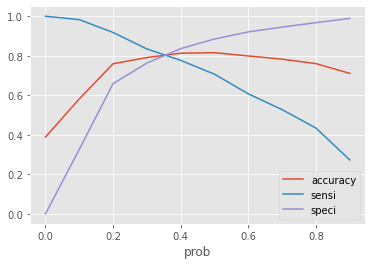

In [94]:
# Plotting the cut-off plots for visualization

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it can bee visualized that the optimal cutoff is at the value of 0.35. Thus checking the prediction at the cutoff value of 0.35

In [95]:
# predictions at the cut-off value of 0.35

y_train_final['final_predicted'] = y_train_final.Converted_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_final.head()

Converted  Converted_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0               0.183094          0    1    1    0    0    0    0   
1          1               0.893099          1    1    1    1    1    1    1   
2          1               0.985104          1    1    1    1    1    1    1   
3          1               0.728440          1    1    1    1    1    1    1   
4          0               0.427303          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    1    1    1    0                1  
2    1    1    1    1                1  
3    1    1    0    0                1  
4    0    0    0    0                1

In [96]:
# cheecking the overall accuracy for the new cut-off value

metrics.accuracy_score(y_train_final.Converted, y_train_final.final_predicted)



0.8047309833024119

In [97]:
# creating the confsuion matrix for the new cut-off value 

conf_metric2 = metrics.confusion_matrix(y_train_final.Converted, y_train_final.final_predicted )

conf_metric2

array([[3177,  777],
       [ 486, 2028]], dtype=int64)

In [98]:
# Calculating other metrics for evaluation

# Substituting values for TP, TN, FP, FN

TP = conf_metric[1,1]

TN = conf_metric[0,0]

FP = conf_metric[0,1]

FN = conf_metric[1,0]



In [99]:
# Calculating the sensitivity of the model

TP / (TP + FN)

0.7068416865552903

In [100]:
# Calculating the specificity of the model

TN /(TN + FP)

0.8849266565503288

With the cut-off as 0.35 we haev the accuracy as 80% , sensitivit as 70% and teh specificity as 88% , which is almost same as the earlier cut-ff which was chosen randomly


## Prediction of Test Data

In [101]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [102]:
# Substituting all the columns in the final train model
col = X_train.columns

# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm



const  TotalVisits  Total Time Spent on Website  \
567     1.0     0.015936                     0.147359   
2303    1.0     0.007968                     0.688859   
1523    1.0     0.011952                     0.596538   
6923    1.0     0.019920                     0.083000   
7841    1.0     0.007968                     0.311585   
...     ...          ...                          ...   
9124    1.0     0.007968                     0.118065   
1049    1.0     0.031873                     0.703506   
7778    1.0     0.007968                     0.135375   
6432    1.0     0.000000                     0.000000   
924     1.0     0.031873                     0.118065   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
567                                     1                          0   
2303                                    1                          0   
1523                                    0                          0   
6923                                    1                          0   
7841                                    1                          0   
...                                   ...                        ...   
9124                                    0                          0   
1049                                    0                          0   
7778                                    1                          0   
6432                                    0                          0   
924                                     1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
567                        0                             0   
2303                       0                             0   
1523                       0                             0   
6923                       0                             0   
7841                       0                             0   
...                      ...                           ...   
9124                       0                             0   
1049                       0                             0   
7778                       0                             0   
6432                       1                             0   
924                        0                             0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
567                             0                                      0   
2303                            0                                      0   
1523                            0                                      0   
6923                            0                                      0   
7841                            0                                      0   
...                           ...                                    ...   
9124                            0                                      0   
1049                            0                                      0   
7778                            0                                      0   
6432                            0                                      0   
924                             0                                      0   

      Last Activity_SMS Sent  Specialization_Others  \
567                        0                      0   
2303                       0                      0   
1523                       0                      0   
6923                       0                      0   
7841                       0                      0   
...                      ...                    ...   
9124                       1                      1   
1049                       0                      1   
7778                       0                      0   
6432                       1                      1   
924                        0                      0   

      What is your current occupation_Not given  \
567                                           0   
2303                               

In [103]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = result.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred = y_pred.rename(columns = {0 : 'Conversion_Prob'})
y_pred.head()

Converted  Conversion_Prob
0          0         0.165802
1          0         0.686931
2          0         0.792663
3          0         0.131715
4          0         0.285940

In [104]:
# Making prediction using cut off 0.35

y_pred['final_predicted'] = y_pred.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred.tail()

Converted  Conversion_Prob  final_predicted
2767          0         0.173870                0
2768          0         0.752708                1
2769          0         0.153210                0
2770          0         0.588887                1
2771          0         0.158708                0

In [105]:
# Check the overall accuracy
metrics.accuracy_score(y_pred['Converted'], y_pred.final_predicted)


0.8073593073593074

In [106]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred['Converted'], y_pred.final_predicted )
confusion2


array([[1385,  340],
       [ 194,  853]], dtype=int64)

In [107]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.8147086914995224

In [109]:
# Calculating the specificity

TN/(TN+FP)

0.8028985507246377

Considering the cut-off as 0.35 we have the accuracy of 80% , sensitivity of 81 % and the specificity of 80%


## Precision and Recall

In [110]:
# Checking the confusion matrix for the new cut-off

confusion = metrics.confusion_matrix(y_train_final.Converted, y_train_final.Predicted )
confusion


array([[3499,  455],
       [ 737, 1777]], dtype=int64)

In [111]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.796146953405018

In [112]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7068416865552903

Considering the cut-off of 0.35 we have the Precision of 79% and the Recall of 70% 

### Precision and Recall tradeoff

In [113]:
# importing the metrics for precision and recall graph

from sklearn.metrics import precision_recall_curve

y_train_final.Converted, y_train_final.Predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

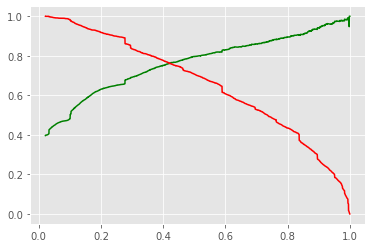

In [114]:
# Threshold values for the precision and recall: 
p, r, thresholds = precision_recall_curve(y_train_final.Converted, y_train_final.Converted_Probability)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [115]:
# The final predicted values over various cut-off values :

y_train_final['final_predicted'] = y_train_final.Converted_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_train_final.head()

Converted  Converted_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0               0.183094          0    1    1    0    0    0    0   
1          1               0.893099          1    1    1    1    1    1    1   
2          1               0.985104          1    1    1    1    1    1    1   
3          1               0.728440          1    1    1    1    1    1    1   
4          0               0.427303          0    1    1    1    1    1    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    1    1    1    0                1  
2    1    1    1    1                1  
3    1    1    0    0                1  
4    0    0    0    0                1

In [116]:
# Accuracy metric :

metrics.accuracy_score(y_train_final.Converted, y_train_final.final_predicted)

0.814625850340136

In [117]:
# Creating confusion matrix again :

confusion2 = metrics.confusion_matrix(y_train_final.Converted, y_train_final.final_predicted )
confusion2

array([[3334,  620],
       [ 579, 1935]], dtype=int64)

In [118]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [119]:
# Calculating the Precision 

TP / (TP + FP)

0.7573385518590998

In [120]:
#Calculating the Recall

TP / (TP + FN)

0.7696897374701671

When we decide the cut-off of 0.41 we have teh precision of 75% and the recall of 77% approx


### Prediction on Test data

In [121]:

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = result.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


y_pred_final.head()

Converted  Conversion_Prob
0          0         0.165802
1          0         0.686931
2          0         0.792663
3          0         0.131715
4          0         0.285940

In [122]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.165802                0
1             0         0.686931                1
2             0         0.792663                1
3             0         0.131715                0
4             0         0.285940                0
...         ...              ...              ...
2767          0         0.173870                0
2768          0         0.752708                1
2769          0         0.153210                0
2770          0         0.588887                1
2771          0         0.158708                0

[2772 rows x 3 columns]

In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.8131313131313131

In [124]:

# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2


array([[1448,  277],
       [ 241,  806]], dtype=int64)

In [125]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [126]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7442289935364728

In [127]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.76981852913085

For the cutoff of 0.41 we have the Acuuracy of 81% the precision of 74% and the recall of 77%

### Observations


Following are the observations from the analysis we have done for the Lead_Scoring Case Study:
1. The variables that are more important with subject to target being converted are :
    * The total time spend on the Website.
    * Total number of visits made to the institute.
    * When the lead source was:
        a. Google
        b. Organic Search
        c. Direct traffic
        d. Welingak website
    * When the last activity was:
        a. SMS
        b. Olark chat conversation
    * When the 'Lead origin' is 'Lead add format'.
    * When their 'current occupation' is as a 'working professional'